<h1><strong><u>Naive Bayes Model</u></strong></h1>

<h2><strong><u>Data Preparation</u></strong></h2>

In [1]:
%%capture
%run DataPreparation.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

I believe that the <strong>BernoulliNB</strong> model is the best Naive Bayes model for this dataset because it is designed for binary/boolean features which is what this dataset has.

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ..................................clf__alpha=0.0001; total time=   5.6s
[CV] END ...................................clf__alpha=0.001; total time=   5.6s
[CV] END ....................................clf__alpha=0.01; total time=   5.6s
[CV] END ..................................clf__alpha=0.0001; total time=   5.6s
[CV] END .....................................clf__alpha=0.1; total time=   5.6s
[CV] END ......................................clf__alpha=10; total time=   5.6s
[CV] END ...................................clf__alpha=0.001; total time=   5.7s
[CV] END .......................................clf__alpha=1; total time=   5.7s
[CV] END ....................................clf__alpha=0.01; total time=   3.1s
[CV] END ......................................clf__alpha=10; total time=   3.0s
[CV] END ..................................clf__alpha=0.0001; total time=   3.1s
[CV] END .....................................clf__alpha=0.1; total time=   3.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   16.6s remaining:   16.6s


[CV] END ......................................clf__alpha=10; total time=   3.2s
[CV] END .......................................clf__alpha=1; total time=   3.2s
[CV] END ..................................clf__alpha=0.0001; total time=   3.3s
[CV] END ...................................clf__alpha=0.001; total time=   3.3s
[CV] END ....................................clf__alpha=0.01; total time=   3.2s
[CV] END .....................................clf__alpha=0.1; total time=   3.2s
[CV] END .......................................clf__alpha=1; total time=   3.2s
[CV] END ......................................clf__alpha=10; total time=   3.3s
[CV] END ..................................clf__alpha=0.0001; total time=   2.8s
[CV] END ...................................clf__alpha=0.001; total time=   2.8s
[CV] END .....................................clf__alpha=0.1; total time=   2.6s
[CV] END ....................................clf__alpha=0.01; total time=   2.7s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.0s finished


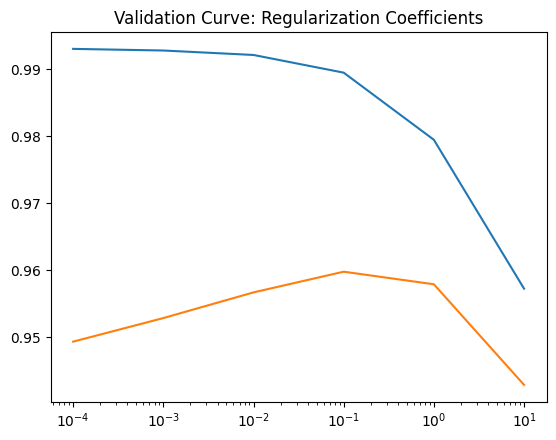

In [7]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h3><strong><u>Cross Validation Testing</u></strong></h3>

In [2]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
param_grid = {
    "clf__alpha": [1, 3, 5, 7, 9],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
nb_classifier = model.best_estimator_
model.best_params_

def nb_model():
    return nb_classifier

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END ......................clf__alpha=1;, score=0.959 total time=   4.8s
[CV 2/5] END ......................clf__alpha=1;, score=0.957 total time=   4.9s
[CV 3/5] END ......................clf__alpha=1;, score=0.960 total time=   4.9s
[CV 1/5] END ......................clf__alpha=3;, score=0.950 total time=   4.8s
[CV 1/5] END ......................clf__alpha=1;, score=0.955 total time=   5.2s
[CV 2/5] END ......................clf__alpha=3;, score=0.950 total time=   5.0s
[CV 3/5] END ......................clf__alpha=3;, score=0.955 total time=   4.9s
[CV 5/5] END ......................clf__alpha=1;, score=0.959 total time=   5.1s
[CV 4/5] END ......................clf__alpha=3;, score=0.952 total time=   3.4s
[CV 5/5] END ......................clf__alpha=3;, score=0.956 total time=   3.3s
[CV 1/5] END ......................clf__alpha=5;, score=0.947 total time=   3.3s
[CV 2/5] END ......................clf__alpha=5;,

{'clf__alpha': 1}

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
The scoring metrics that I used for the Grid Search cross-validation test was accuracy since the dataset is balanced. I chose to use the Bernoulli model because I feel like its strengths fits the needs of this dataset the best. Using a logarithmic range of regularization coefficients, I found that 0.1-10 was the best range with 1 being the most likely regularization coefficient to be chosen in the Grid Search test. Using a TD-IDF vectorizer and Bernoulli model in a pipeline, the result was an alpha value of 1.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curves</u></strong></h4>

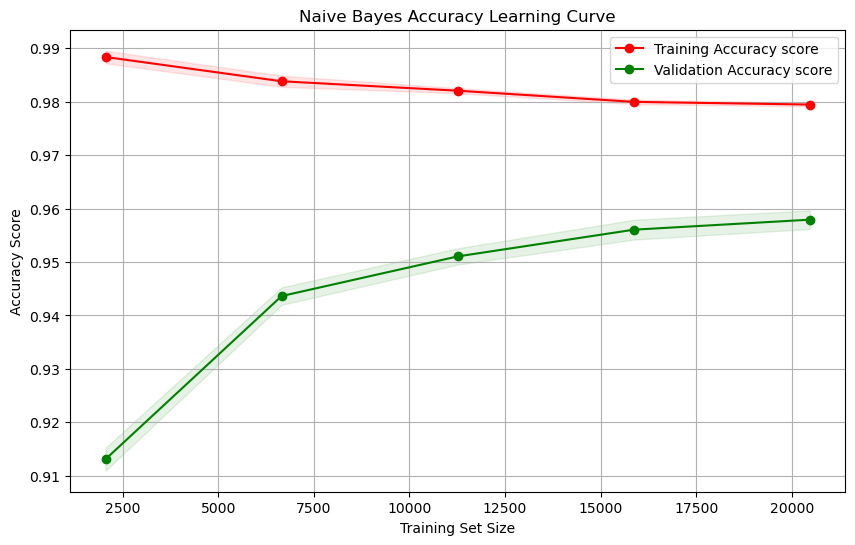

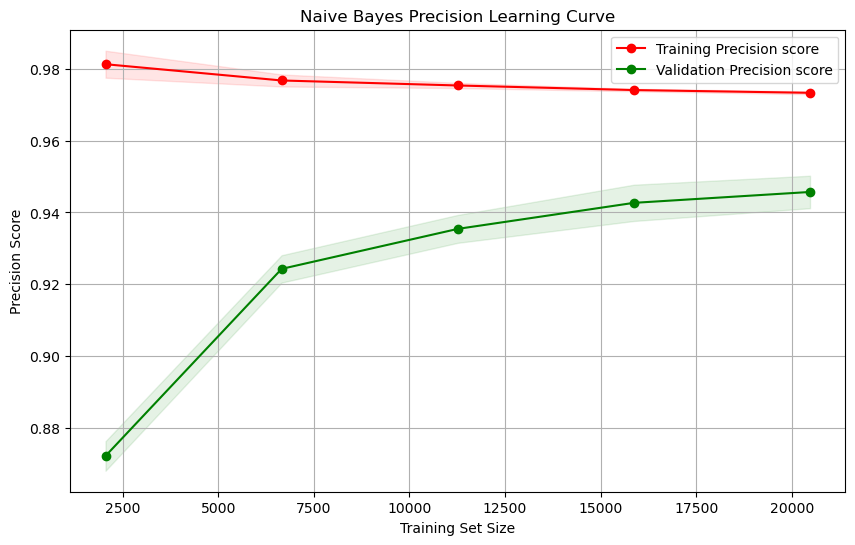

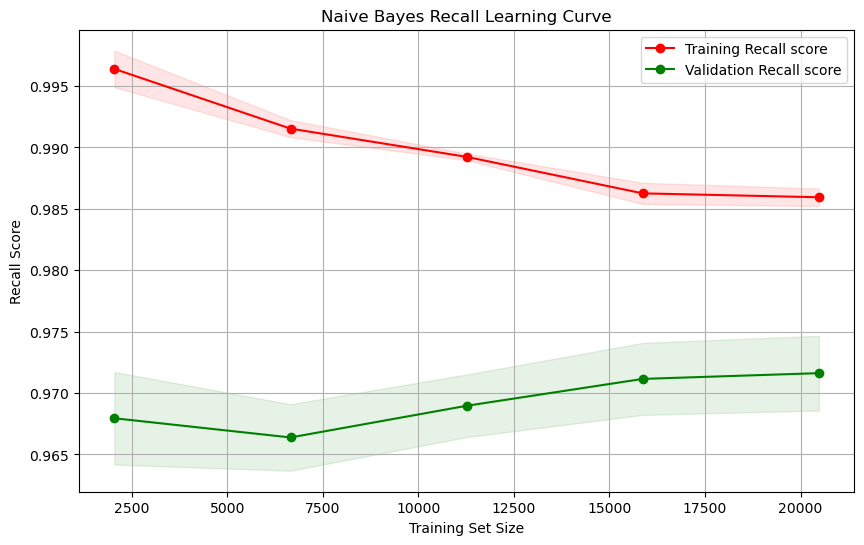

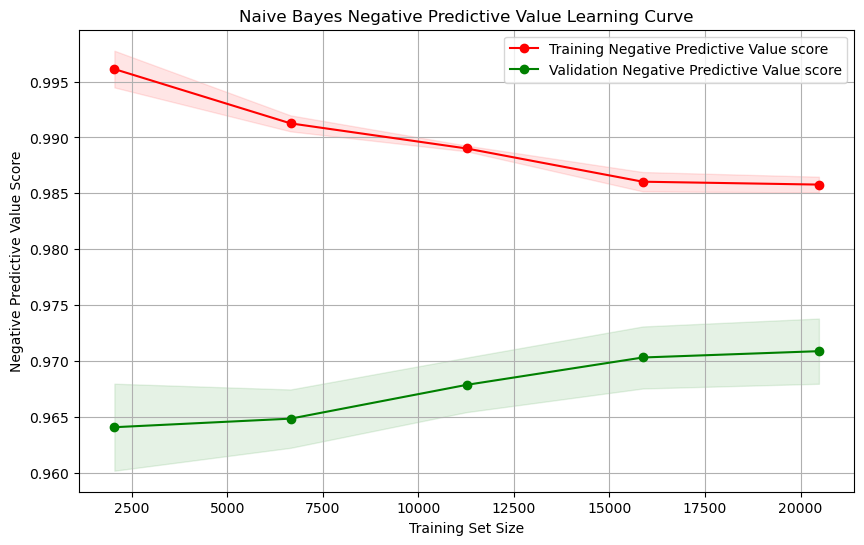

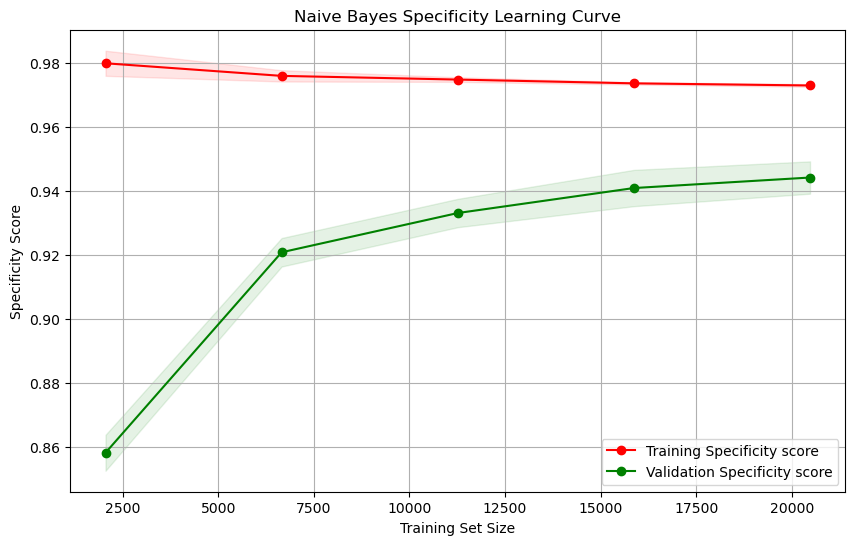

In [6]:
for key, value in clf_metrics.items():
    nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
        nb_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
    nb_train_scores_std = np.std(nb_train_scores, axis=1)
    nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
    nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Naive Bayes {key} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(f"{key} Score")
    plt.grid()

    plt.fill_between(nb_train_sizes, nb_train_scores_mean - nb_train_scores_std,
                    nb_train_scores_mean + nb_train_scores_std, alpha=0.1, color="r")
    plt.fill_between(nb_train_sizes, nb_validation_scores_mean - nb_validation_scores_std,
                    nb_validation_scores_mean + nb_validation_scores_std, alpha=0.1, color="g")
    plt.plot(nb_train_sizes, nb_train_scores_mean, 'o-', color="r",
                label=(f"Training {key} score"))
    plt.plot(nb_train_sizes, nb_validation_scores_mean, 'o-', color="g",
                label=(f"Validation {key} score"))

    plt.legend(loc="best")
    plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [7]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.95488281 0.95722656 0.95976562 0.95917969 0.95859375]
Training Average and Standard Error:  0.96% ± 0.17% 

Precision
CV Training Scores:  [0.93858327 0.94688575 0.95265589 0.94438138 0.9460076 ]
Training Average and Standard Error:  0.95% ± 0.45% 

Recall
CV Training Scores:  [0.97342712 0.96872557 0.96755278 0.97576231 0.97263487]
Training Average and Standard Error:  0.97% ± 0.30% 

Negative Predictive Value
CV Training Scores:  [0.97242498 0.96803835 0.96708961 0.97496972 0.97188755]
Training Average and Standard Error:  0.97% ± 0.29% 

Specificity
CV Training Scores:  [0.93635299 0.94574551 0.95199063 0.94262295 0.94457455]
Training Average and Standard Error:  0.94% ± 0.50% 



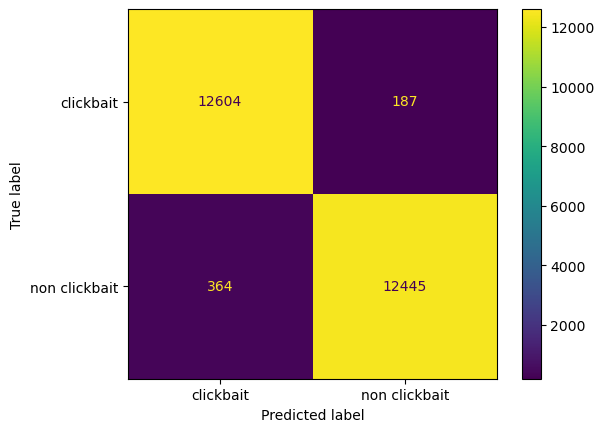

In [8]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_classifier, X_train, y_train, labels=['clickbait', 'non clickbait'])

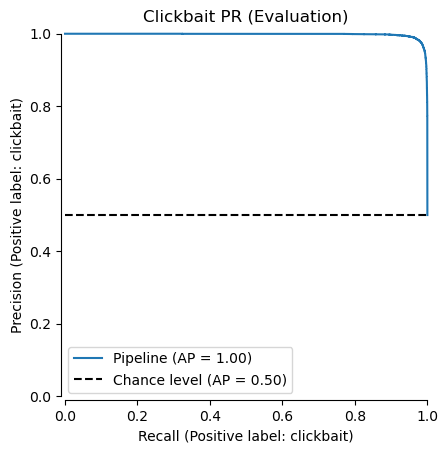

In [9]:
disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_train, y_train, pos_label="clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Clickbait PR (Evaluation)")
plt.show()

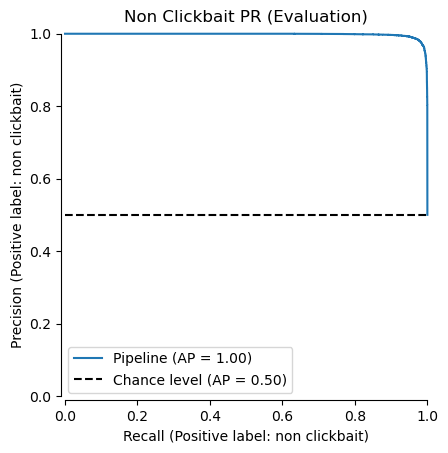

In [10]:
disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_train, y_train, pos_label="non clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Non Clickbait PR (Evaluation)")
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected model, I found positive results for all evaluation methods. The learning curves yielded good results and the 'cross_val_score' function evaluation results reinforced the learning curve values. In addition, the Confusion Matrix and the Precision-Recall plots displayed good results. As a result, I will move forward with this model to the 'Model Testing' section.

<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [16]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(nb_classifier, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.9375     0.93359375 0.94296875 0.93984375 0.94453125]
Average and Standard Error:  0.94% ± 0.39% 

Precision
CV test Scores:  [0.91691395 0.910162   0.92399404 0.91964286 0.92410714]
Average and Standard Error:  0.92% ± 0.52% 

Recall
CV test Scores:  [0.96261682 0.96261682 0.96573209 0.96411856 0.96879875]
Average and Standard Error:  0.96% ± 0.23% 

Negative Predictive Value
CV test Scores:  [0.96039604 0.96006656 0.96387521 0.96217105 0.96710526]
Average and Standard Error:  0.96% ± 0.26% 

Specificity
CV test Scores:  [0.91222571 0.90438871 0.9200627  0.91549296 0.92018779]
Average and Standard Error:  0.91% ± 0.59% 



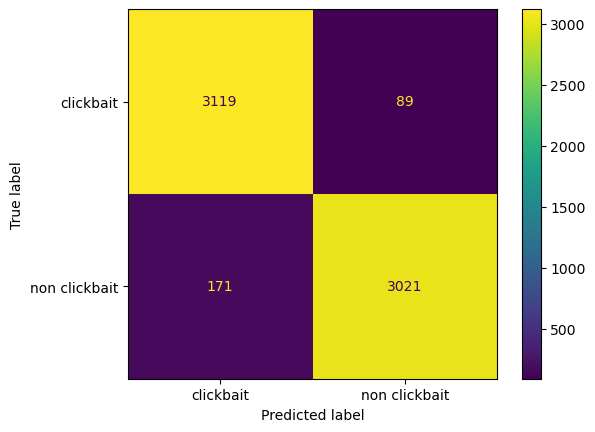

In [17]:
# #Testing Confusion Matrix
nb_test_predictions = nb_classifier.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, nb_test_predictions, labels=['clickbait', 'non clickbait'])

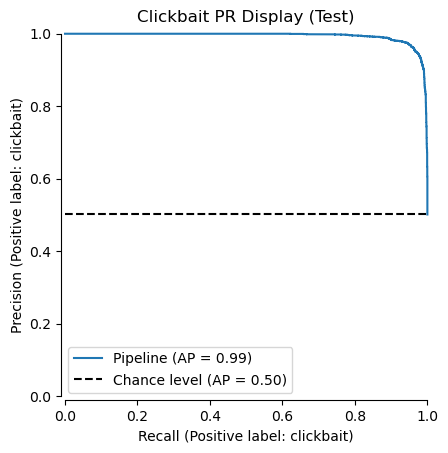

In [18]:
disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_test, y_test, pos_label="clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Clickbait PR Display (Test)")
plt.show()

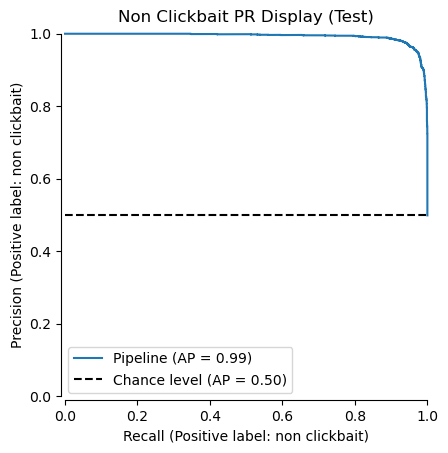

In [19]:
disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_test, y_test, pos_label="non clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Non Clickbait PR Display (Test)")
plt.show()

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
In the testing phase of my selected model, I found that the testing results from all methods were good and in keeping with my results from the 'Model Evaluation' section. 

<h2><strong><u>Conclusion</u></strong></h2>
Considering the results of the experiment, I believe this model can used for clickbait classification.